In [39]:
import subprocess
import optuna
import os
import matplotlib.pyplot as plt
import numpy as np

In [52]:
study_metadata = {"study_name": "graphormer", "storage": "sqlite:///graphormer.db'"}
study = optuna.load_study(**study_metadata)

study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_blocks,params_layers,params_lr,params_num_head,params_warmup_steps,state
0,0,0.403441,2022-09-13 23:18:16.864180,2022-09-13 23:39:26.332503,0 days 00:21:09.468323,1,10,0.000119,12,2,COMPLETE
1,1,0.412672,2022-09-13 23:39:26.419085,2022-09-13 23:52:04.096767,0 days 00:12:37.677682,1,3,0.000018,24,1,COMPLETE
2,2,0.406821,2022-09-13 23:52:04.137282,2022-09-14 00:11:50.590592,0 days 00:19:46.453310,1,9,0.000157,6,115,COMPLETE
3,3,0.402547,2022-09-14 00:11:50.600997,2022-09-14 00:33:24.039043,0 days 00:21:33.438046,1,10,0.000173,24,950,COMPLETE
4,4,0.412589,2022-09-14 00:33:24.122289,2022-09-14 00:44:13.341216,0 days 00:10:49.218927,2,1,0.000023,32,288,COMPLETE
5,5,0.418003,2022-09-14 00:44:13.352324,2022-09-14 00:54:40.619681,0 days 00:10:27.267357,1,1,0.000012,48,3110,COMPLETE
6,6,0.409975,2022-09-14 00:54:40.631176,2022-09-14 01:04:40.827485,0 days 00:10:00.196309,1,1,0.000034,6,356,COMPLETE
7,7,0.402091,2022-09-14 01:04:40.863843,2022-09-14 01:25:14.201671,0 days 00:20:33.337828,1,9,0.000290,32,133,COMPLETE
8,8,0.435471,2022-09-14 01:25:14.978934,2022-09-14 01:50:41.086025,0 days 00:25:26.107091,4,6,0.000333,6,99,COMPLETE
9,9,0.414185,2022-09-14 01:50:41.135215,2022-09-14 02:06:48.597763,0 days 00:16:07.462548,1,6,0.000807,6,2,COMPLETE


In [60]:
vals = study.trials_dataframe()['value']
trials = np.arange(1, len(vals))
tuning_vals = [min(vals[:t]) for t in trials]

tuning_tests = [0.398776, 0.398776, 0.398776, 0.401704, 0.401704, 0.401704, 0.401704, 0.395896, 0.395896]
tuning_tests += [0.395896] * (len(tuning_vals) - len(tuning_tests))

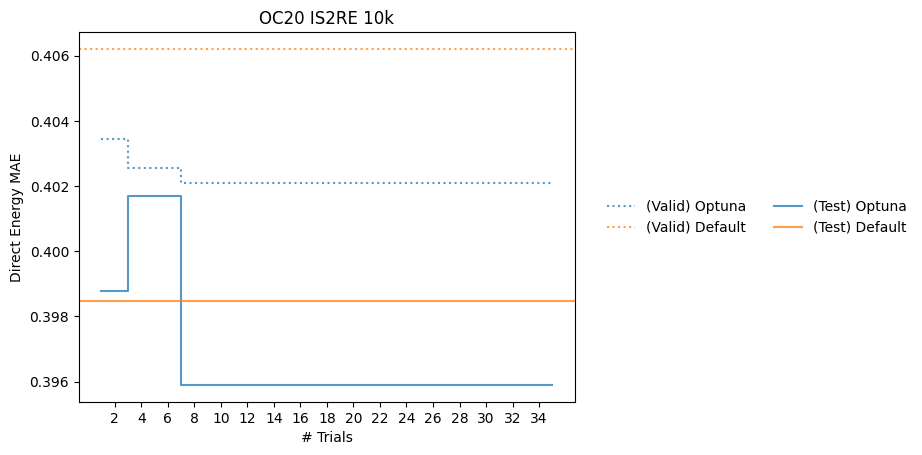

In [74]:


plt.ylabel('Direct Energy MAE')
plt.xlabel('# Trials')

plt.step(trials, tuning_vals, label='(Valid) Optuna', 
    linestyle=':', color='C0', alpha=0.75)
plt.axhline(0.406207, label='(Valid) Default', 
    linestyle=':', color='C1', alpha=0.75)
    
plt.step(trials, tuning_tests, label='(Test) Optuna', 
    linestyle='-', color='C0', alpha=0.75)
plt.axhline(0.398474, label='(Test) Default', 
    linestyle='-', color='C1', alpha=0.75)

plt.title('OC20 IS2RE 10k')
plt.xticks(trials[1::2])
plt.legend(frameon=False, ncol=2, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [13]:
def objective(trial):
    m = trial.suggest_float("x", -100, 100)
    outs = subprocess.run(
        ["python", f"test.py", f"-m={m}"], 
        capture_output=True, text=True).stdout
    out = float(outs.strip())
    return out

In [14]:
# Let us minimize the objective function above.
print("Running 10 trials...")
study = optuna.load_study(study_name="test-study", storage="sqlite:///test.db'")
study.optimize(objective, n_trials=10)
print("Best value: {} (params: {})\n".format(study.best_value, study.best_params))
#study.add_trials(study.trials)


Running 10 trials...


[I 2022-09-13 22:23:23,483] Trial 280 finished with value: 8.652166232003475 and parameters: {'x': 8.059311134834447}. Best is trial 264 with value: -1.5041420970860502.
[I 2022-09-13 22:23:23,710] Trial 281 finished with value: 6.523000594807506 and parameters: {'x': -7.525938657859914}. Best is trial 264 with value: -1.5041420970860502.
[I 2022-09-13 22:23:23,927] Trial 282 finished with value: 1.4251677413325683 and parameters: {'x': 1.4723008444736965}. Best is trial 264 with value: -1.5041420970860502.
[I 2022-09-13 22:23:24,133] Trial 283 finished with value: 5.047970132251589 and parameters: {'x': 5.091067087476559}. Best is trial 264 with value: -1.5041420970860502.
[I 2022-09-13 22:23:24,350] Trial 284 finished with value: 1.4394541408691335 and parameters: {'x': 1.9518291998728672}. Best is trial 264 with value: -1.5041420970860502.
[I 2022-09-13 22:23:24,540] Trial 285 finished with value: 10.859073664661919 and parameters: {'x': 9.588128229851598}. Best is trial 264 with va

Best value: -1.5041420970860502 (params: {'x': 0.2864795611697961})

